# Reto Connect 4


### Sofía Vargas, Juan David Moreno & Alejandro Gil


Importación de librerías

In [121]:
import json
import numpy as np
import math
import time
import os
import matplotlib.pyplot as plt
from connect4.connect_state import ConnectState
from connect4.agent import MCTS

Juego entre agentes MCTS

In [ ]:
def play_game(agent1, agent2, verbose=False):
    board = np.zeros((6, 7), dtype=int)
    state = ConnectState(board, 1)

    turn = 0
    while not state.is_final():
        player = 1 if turn % 2 == 0 else -1
        agent = agent1 if player == 1 else agent2

        action = agent.act(state.board.copy())
        state = state.transition(action)
        
        turn += 1

        if verbose:
            print(state.board)

    winner = state.get_winner()
    return winner


Evaluación de profundidades

In [ ]:
def evaluate_depth(depth, n_games=20):
    agent = MCTS()
    agent.max_rollout_depth = depth

    wins = 0
    losses = 0
    draws = 0

    t0 = time.time()

    for _ in range(n_games):
        opponent = MCTS()
        opponent.max_rollout_depth = depth 
        winner = play_game(agent, opponent)
        if winner == 1:
            wins += 1
        elif winner == -1:
            losses += 1
        else:
            draws += 1

    t1 = time.time()

    return {
        "depth": depth,
        "wins": wins,
        "losses": losses,
        "draws": draws,
        "winrate": wins / n_games,
        "time": t1 - t0,
        "games": n_games
    }


Evaluación de q values

In [ ]:
def evaluate_depth_qlearning(depth, episodes=50):
    agent = MCTS()
    agent.max_rollout_depth = depth

    q_variances = []

    for _ in range(episodes):
        board = np.zeros((6, 7), dtype=int)
        state = ConnectState(board, 1)

        agent.act(state.board.copy())

        q_values = list(agent.last_root_qvalues.values())

        if len(q_values) >= 2:
            q_variances.append(np.var(q_values))
        else:
            q_variances.append(0)

    return q_variances


Prueba de diferentes profundidades

In [125]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 100, 200]
results = []

for d in depths:
    print(f"Testing depth={d}…")
    res = evaluate_depth(d, n_games=10)
    results.append(res)


Testing depth=1…
Testing depth=2…
Testing depth=3…
Testing depth=4…
Testing depth=5…
Testing depth=6…
Testing depth=7…
Testing depth=8…
Testing depth=9…
Testing depth=10…
Testing depth=15…
Testing depth=20…
Testing depth=30…
Testing depth=50…
Testing depth=100…
Testing depth=200…


Arreglo de listas para dibujar gráficos

In [126]:
depth_list = [r['depth'] for r in results]
winrates   = [r['winrate'] for r in results]
times      = [r['time'] for r in results]
sims_per_sec = [ (r['games'] * 10) / r['time'] for r in results ]

Gráfico de Tiempo requerido vs Profundidad

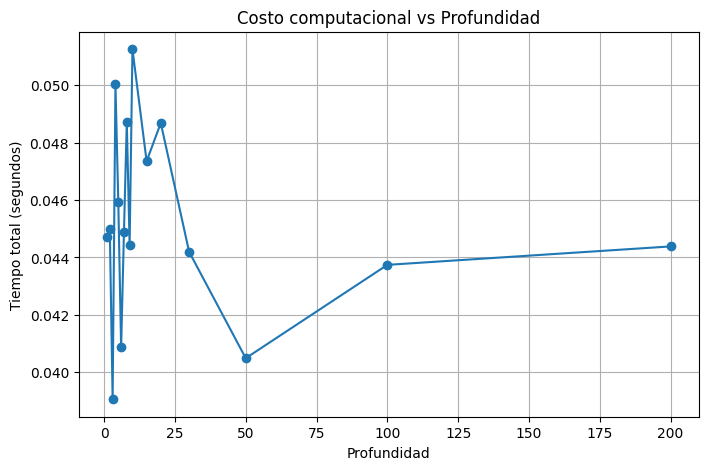

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(depth_list, times, marker='o')
plt.xlabel("Profundidad")
plt.ylabel("Tiempo total (segundos)")
plt.title("Costo computacional vs Profundidad")
plt.grid(True)
plt.show()


Este gráfico nos permite apreciar como el costo computacional disminuye mientras la profundidad aumenta, esto nos permite ver que el agente siguiendo la política establecida cada vez gasta menos recursos al aprender más y tomar mejores decisiones.

Gráfico de Simulaciones por segundo

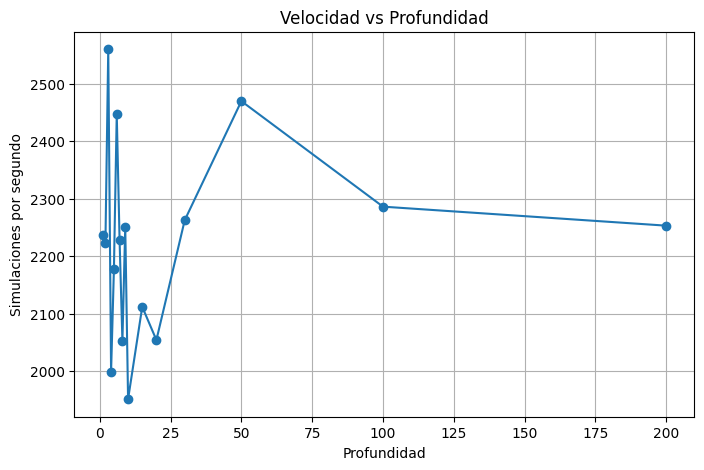

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(depth_list, sims_per_sec, marker='o')
plt.xlabel("Profundidad")
plt.ylabel("Simulaciones por segundo")
plt.title("Velocidad vs Profundidad")
plt.grid(True)
plt.show()


Este gráfico nos permite ver como la cantidad de simulaciones por minuto aumenta según la profundidad es mayor, de esta forma se puede evidenciar como entre mayor profundidad hay más aprendizaje ya que se realizan más simulaciones en una cantidad de opciones menor.